In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# View the dataset
data = pd.read_csv('Walmart (1).csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
# Data understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#Check the null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
#Check duplicates
data.duplicated().sum()

np.int64(0)

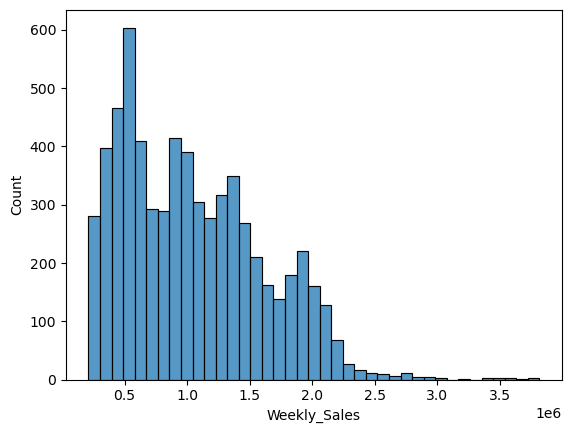

In [7]:
# Do EDA
# Univariate Analysis
# Distribution of sales using histograms and box plots.
sns.histplot(data['Weekly_Sales'])
plt.show()

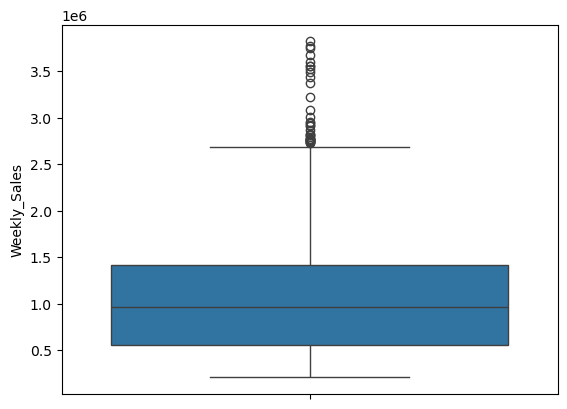

In [8]:
#Do the box plot
sns.boxplot(data['Weekly_Sales'])
plt.show()

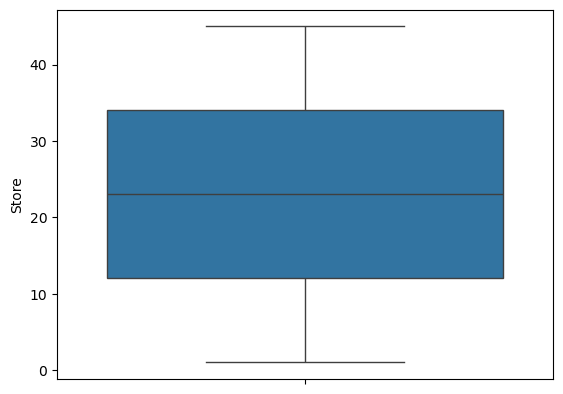

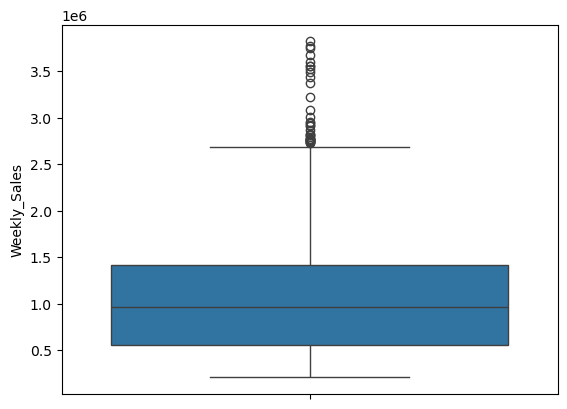

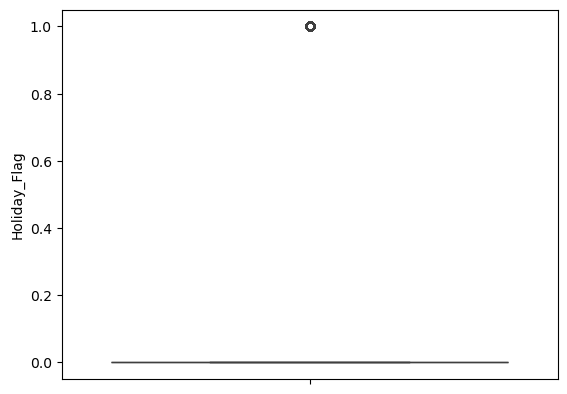

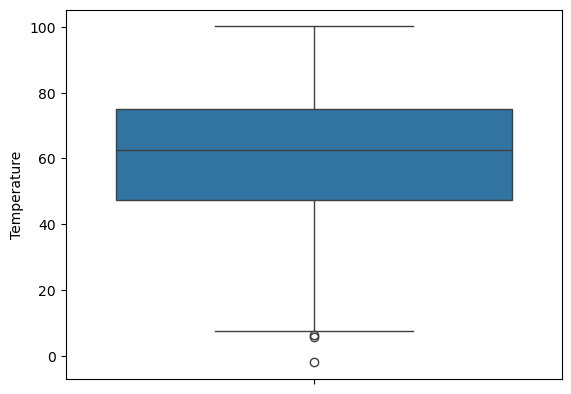

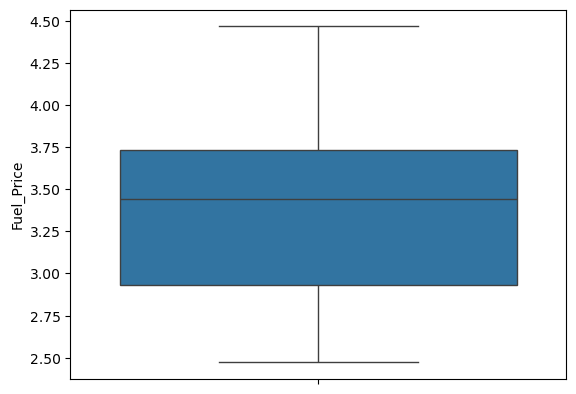

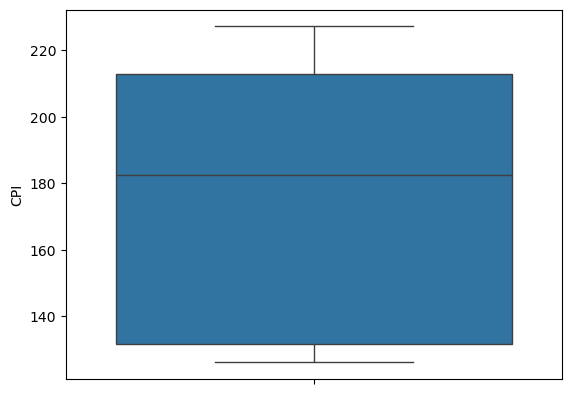

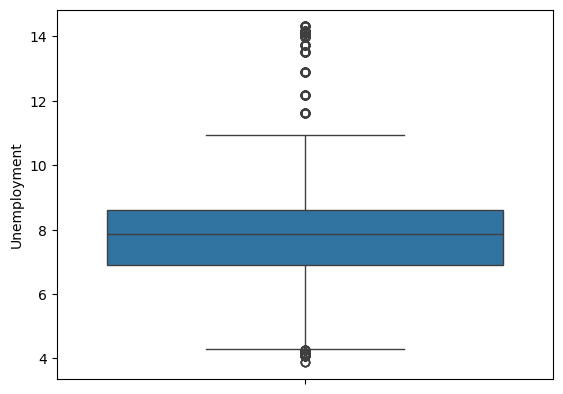

In [9]:
# Check for outliers for all columns

for col in data.columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        sns.boxplot(data[col])
        plt.show()

In [10]:
# Remove the outlier in Holiday_Flag
# Q1 = data['Holiday_Flag'].quantile(0.25)
# Q3 = data['Holiday_Flag'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR
# data = data[(data['Holiday_Flag'] >= lower_bound) & (data['Holiday_Flag'] <= upper_bound)]

# sns.boxplot(data['Holiday_Flag'])
# plt.show()

In [11]:
#data['Holiday_Flag'] # No need to remove the outlier

In [12]:
# Correlation analysis
correlation = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().iloc[:, 1]

# Identify most affected stores
affected_stores = correlation.abs().sort_values(ascending=False).head(5)
print("Most affected stores by unemployment:", affected_stores)

Most affected stores by unemployment: Store
36    0.833734
38    0.785290
44    0.780076
35    0.483865
39    0.384681
Name: (Weekly_Sales, Unemployment), dtype: float64


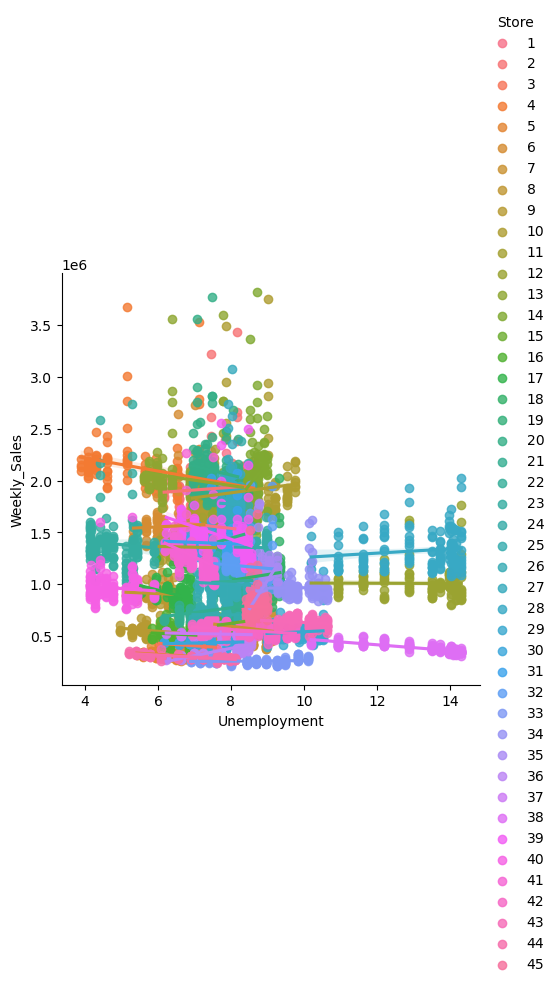

In [14]:
sns.lmplot(x='Unemployment', y='Weekly_Sales', hue='Store', data=data)

Correlation with Temperature: -0.06381001317946852


<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

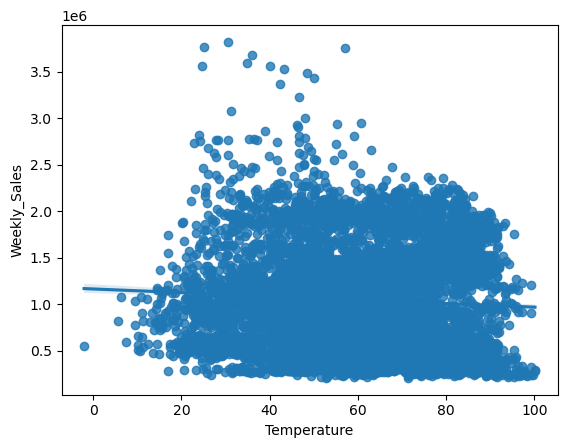

In [15]:
# Correlation check
temp_corr = data[['Weekly_Sales', 'Temperature']].corr().iloc[0, 1]
print(f"Correlation with Temperature: {temp_corr}")

# Scatter plot
sns.regplot(x='Temperature', y='Weekly_Sales', data=data)

In [16]:
from sklearn.linear_model import LinearRegression

# Linear regression
X = data[['CPI']]
y = data['Weekly_Sales']

model = LinearRegression()
model.fit(X, y)

print(f"R-squared value: {model.score(X, y)}")

R-squared value: 0.005275721495278551


Top Performing Stores:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


<Axes: xlabel='Store'>

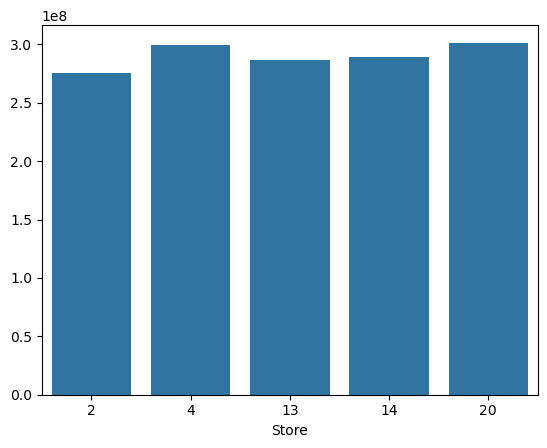

In [17]:
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
print("Top Performing Stores:\n", top_stores)

# Visualization
sns.barplot(x=top_stores.index, y=top_stores.values)

In [18]:
# Identify top and bottom stores
worst_store = data.groupby('Store')['Weekly_Sales'].sum().idxmin()
best_store = data.groupby('Store')['Weekly_Sales'].sum().idxmax()

# Difference calculation
sales_difference = data.groupby('Store')['Weekly_Sales'].sum().max() - data.groupby('Store')['Weekly_Sales'].sum().min()

print(f"Worst performing store: {worst_store}")
print(f"Sales difference between best and worst store: {sales_difference}")

Worst performing store: 33
Sales difference between best and worst store: 264237570.49999997


**Qs 2**

In [ ]:
# Ensure frequency is set
df = data.asfreq('W')

# Forecast for each store
stores = df['Store'].unique()
forecasts = {}

for store in stores:
    store_data = df[df['Store'] == store]['Weekly_Sales']

    # Check for stationarity using ADF test
    result = adfuller(store_data)
    print(f"ADF Statistic for store {store}: {result[0]}")
    print(f"p-value: {result[1]}")

    # If p-value is above 0.05, difference the data to make it stationary
    if result[1] > 0.05:
        store_data = store_data.diff().dropna()

    # Fit ARIMA model
    model = ARIMA(store_data, order=(1, 1, 1))  # Example: ARIMA(1,1,1)
    model_fit = model.fit()

    # Forecast next 12 weeks
    forecast = model_fit.forecast(steps=12)
    forecasts[store] = forecast

    # Plot the forecast
    plt.figure(figsize=(10, 5))
    plt.plot(store_data.index, store_data, label="Actual Sales")
    plt.plot(pd.date_range(store_data.index[-1], periods=13, freq='W')[1:], forecast, label="Forecasted Sales", color='red')
    plt.title(f"Store {store} - Forecasted Sales for the Next 12 Weeks")
    plt.legend()
    plt.show()


In [ ]:
from prophet import Prophet

# Prepare the dataframe for Prophet (must have 'ds' and 'y' columns)
df_prophet = df[['Weekly_Sales']].reset_index()
df_prophet.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

# Create and fit a Prophet model for each store
for store in stores:
    store_data = data[data['Store'] == store][['Date', 'Weekly_Sales']]
    store_data = store_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

    # Initialize Prophet model
    model = Prophet()

    # Fit the model
    model.fit(store_data)

    # Create future dataframe for 12 weaeks ahead
    future = model.make_future_dataframe(periods=12, freq='W')

    # Forecast the next 12 weeks
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast)
    plt.title(f"Store {store} - Forecasted Sales for the Next 12 Weeks")
    plt.show()